<a href="https://colab.research.google.com/github/MANYI-anewbird/775/blob/main/assignment2_830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Experimentation and Causal Methods

## Assignment 2: Rocket Fuel

### Due Date: 8am, February 6th, 2025

Manyi Hong


__Instructions:__

Please read the case about RocketFuel from the HBS Case Pack.
For the assignment you need to read the Rocketfuel case, but answer the questions in the assignment. You can ignore the questions on the HBS website


__Important:__

- Remember to write your name in the above markdown cell.

- Remember to write out your answers in words, don't just output Python statistics.
  - EX: Rather then outputting just `10000.0`, say "TaskaBella made $10,000.00 profit from the campaign."

- Before you submit the notebook, please make sure that the text is readable and does not spill over the right side of the screen. To prevent this from happening, make sure to write your verbal answer in the markdown blocks.
  
- The definitions for the columns in the data are in case! Please read them carefully.


In [1]:
%%capture
!pip install pingouin # install the package used for statistical analyses

In [2]:
# import modules and functions
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
pg.options['round.column.CI95%'] = 6
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# read data (change the path)
# ads_data = pd.read_csv('/content/drive/MyDrive/rocketfuel_data.csv')
ads_data = pd.read_csv('/content/rocketfuel_data.csv')
ads_data


,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588106,1496403,1,0,24,2,19
588107,1496404,1,0,199,6,19
588108,1496405,1,0,211,6,15
588109,1496406,1,0,98,5,19


**Shunto Note: There are like 3 rows with NaN. No point needs to be deducted if they are not removed, but it may create some differences in answers, like in Q4.**

In [4]:
ads_data.dropna(inplace=True)

In [5]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588111 entries, 0 to 588110
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         588111 non-null  int64
 1   test            588111 non-null  int64
 2   converted       588111 non-null  int64
 3   tot_impr        588111 non-null  int64
 4   mode_impr_day   588111 non-null  int64
 5   mode_impr_hour  588111 non-null  int64
dtypes: int64(6)
memory usage: 26.9 MB


### 1. ATE and statistical significance.
#### 1.a What is the $\widehat{ATE}$ of the ads on purchases (conversions)? What does the number mean in words?


In [6]:
ads_data['test'].astype(float)
ads_data['converted'].astype(float)

,converted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
588106,0.0
588107,0.0
588108,0.0
588109,0.0


In [7]:
# your code here

a = ads_data[ads_data['test']== 1]['converted'].mean()
b = ads_data[ads_data['test']== 0]['converted'].mean()

ATE = a-b
print(ATE)


0.007692804899280245


The advertising campaign increases the conversion rate by about 0.77 percentage points, which means that compared with those not exposed to the advertisement, users with advertisements are 0.77% more likely to convert.

#### 1.b Did the campaign cause more purchases? Is this difference statistically significant?
Hint: Use the pg.ttest function.

In [8]:
ads_data.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14


In [9]:
import pingouin as pg
t_test = pg.ttest(ads_data[ads_data['test']== 1]['converted'],ads_data[ads_data['test']== 0]['converted'], paired = False, alternative = 'two-sided')
print(t_test)

alpha = 0.05
tstat = t_test.iloc[0]['T']
pvalue = t_test.iloc[0]['p-val']
reject = pvalue < alpha
ci= t_test.iloc[0]['CI95%']
CI_lower = ci[0]
CI_upper = ci[1]

print(f't-statistic(t):{tstat}')
print(f'p-value(p):{pvalue}')
print(f'Do we reject H0? {reject}')
print(f'Confident Interval: {CI_lower}, {CI_upper}')

              T           dof alternative         p-val                 CI95%  \
T-test  8.65791  26385.467637   two-sided  5.074303e-18  [0.005951, 0.009434]   

         cohen-d       BF10  power  
T-test  0.049048  1.409e+14    1.0  
t-statistic(t):8.657910061879496
p-value(p):5.0743031646645544e-18
Do we reject H0? True
Confident Interval: 0.005951, 0.009434


Yes, based on the result of the function, we can see pvalue is very small, which means that if there is no effect, the probability for us to observe the current outcome is extremely small, in other words, the advertisement has effect. What's more, the 95% confidence interval for the difference in conversion rates is [0.005951, 0.009434], which does not include 0. This further supports the conclusion that the advertisement positively impacted purchases.

### 2. Was the campaign profitable?
#### 2.a How much more profit did TaskaBella make **per person** by showing ads (excluding advertising costs)?
Hint: the profit per conversion is given on page 2 of the case.

In [10]:
ads_data

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588106,1496403,1,0,24,2,19
588107,1496404,1,0,199,6,19
588108,1496405,1,0,211,6,15
588109,1496406,1,0,98,5,19


In [11]:
noad_conversion = ads_data[ads_data['test']==0]['converted'].mean()
isad_conversion = ads_data[ads_data['test']==1]['converted'].mean()

conversion_diff = isad_conversion - noad_conversion
profit_per_conversion = 40 * conversion_diff
print(profit_per_conversion)

0.3077121959712098


In [12]:
conversion_diff = isad_conversion - noad_conversion
conversion_diff


0.007692804899280245

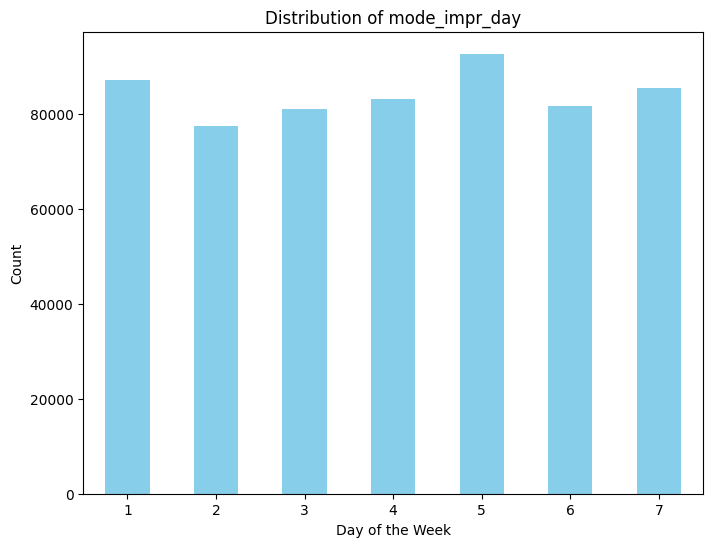

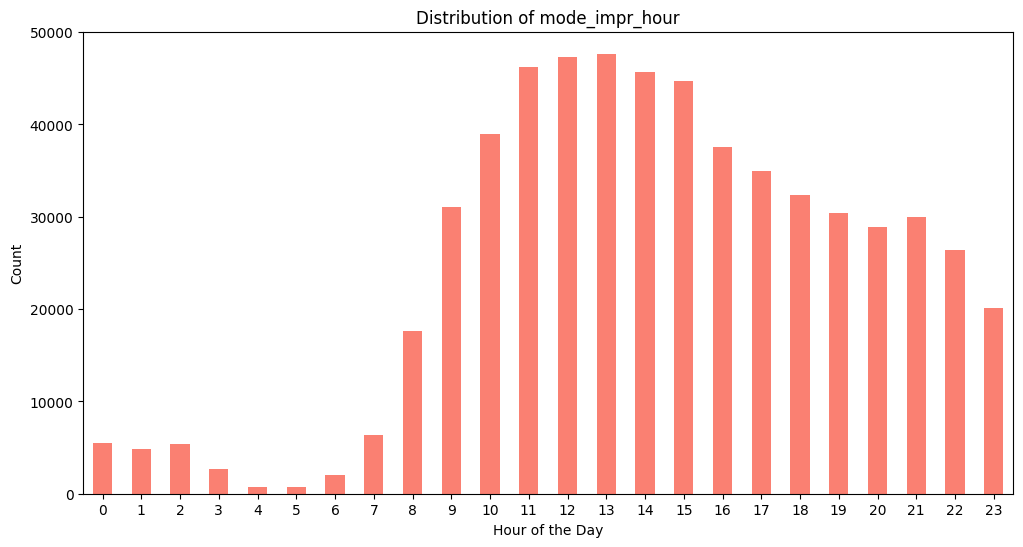

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


day_counts = ads_data['mode_impr_day'].value_counts().sort_index()
hour_counts = ads_data['mode_impr_hour'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of mode_impr_day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of mode_impr_hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


TaskaBella will make more profits of $0.31 per person by showing ads.

#### 2.b What was the cost of the campaign per person (including the control group)?  
Hint: The cost per thousand impressions is $9

In [13]:
total_cost = 9 * ads_data['tot_impr'].sum()/1000
cost_per_person = total_cost/ads_data['user_id'].count()
print(cost_per_person)

0.22340694868825783


In [14]:
total_cost

131388.084

The cost of the campaign per person is $0.22.

#### 2.c Calculate the ROI of the campaign (including the control group). Was the campaign profitable?  
The ROI is calculated by
$$\text{ROI} = \frac{\text{Effect on Profits per Person in Campaign} - \text{Cost of Ads per Person in Campaign}}{\text{Cost of Ads per Person in Campaign}}$$

In [15]:
ROI = (profit_per_conversion - cost_per_person)/cost_per_person
print(ROI)

0.37736179549451504


Yes, the campagin is profitable with a ROI is 0.38

#### 2.d What was the opportunity cost of including a control group --- how much more could TaskaBella have made by not having a control group at all?
Hint: The opportunity cost is the profits that TaskaBella missed out by having a control group.

In [16]:
test_conversion_rate = ads_data[ads_data['test']== 1]['converted'].mean()
control_conversion_rate = ads_data[ads_data['test']== 0]['converted'].mean()

conversion_lost_rate = test_conversion_rate - control_conversion_rate
control_number = ads_data[ads_data['test']== 0]['user_id'].count()
opportunity_cost = 40 * conversion_lost_rate * control_number
print(opportunity_cost)

7238.92941022271


The opportunity cost of including a control group is 7238.93, which means that if all member are in the test group, TaskaBella can earn more 7238.93 dollars.

### 3. Did the number of impressions seen by each user influence the effectiveness of advertising?

#### 3a. Plot the conversion rate by treatment group and by the number of impressions (groups into ranges, e.g. [0, 100), [100, 500), etc) seen by users.

In [17]:
bins = pd.IntervalIndex.from_tuples([(0,50), (50,100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 10000)])
ads_data_1 = ads_data[ads_data['test']==1]
ads_data_1['test_group_impr_count'] = pd.cut(ads_data_1['tot_impr'], bins)

<ipython-input-17-cc157f0aa831>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_data_1['test_group_impr_count'] = pd.cut(ads_data_1['tot_impr'], bins)


#### 3.b Based on the above figure, can we say that more impressions cause more conversions? (No more than 2 sentences)

No, while the conversion rate shows a strong correlation with impressions (more impressions suggest higher interest, then more likely to order), this does not imply causation, as other factors may influence conversions.

### 4 Calculate the power of this experiment.

#### 4.a Calculate Cohen's D without using `pg.ttest`. Cohen's D, in this case, is the estimated average treatment effect on conversion divided by the standard deviation of conversion.

In [19]:
cd = ATE/ads_data['converted'].std()
print(cd)

0.04904604110542456


The Cohen's D is 0.049

#### 4.b Use the `power_ttest2n` function in `pingouin` to calculate the statistical power of the experiment.

In [20]:
n = pg.power_ttest(d=cd, power=.8, alpha=.05,alternative='two-sided')
print(f'Necessary sample size: {np.ceil(n)}')

Necessary sample size: 6527.0


In [21]:
power = pg.power_ttest(d=cd, n=6527.0, alpha=0.05, alternative='two-sided')
print(f'Statistic power: {np.round(power, 3)}')


Statistic power: 0.8


#### 4.c What would the power be instead if the true effect had a cohen's D of .01?

In [22]:
power_2 = pg.power_ttest(d=.01, n=6527.0, alpha=.05, alternative = 'two-sided')
print(f'Statistic power with cohens d of .01: {np.round(power_2,3)}')

Statistic power with cohens d of .01: 0.088


#### 4.d What would the power be instead if the true effect had a cohen's of .01 and the sample was equally split between treatment and control?

In [23]:
power_3 = pg.power_ttest(d=.01, n=ads_data[ads_data['test']==1]['user_id'].count(), alpha=.05, alternative = 'two-sided')
print(f'Statistic power with sample splited: {np.round(power_3,3)}')

Statistic power with sample splited: 1.0


### 5. Case Discussion in Class
Please write what you would discuss in your presentation to TaskaBella. Your answer should be one paragraph and the paragraph should be five or fewer sentences. Be prepared to discuss in class. Think about what is the most important thing to say to TaskaBella.
No additional analysis is needed to answer this question.

Overall, this advertising campaign covered around 590,000 users with 14.5 million impressions in total, which achieved an approximately 2.5% conversion rate with 15,000 users bringing the new handbags.  Specifically, the treatment group and control group were exposed to the experiment 24 times per person, but the conversion rate of the treatment group was higher, like 0.77% than the control group. The campaign incurred a total cost of 131,388, averaging 0.22 per person, and generated an ROI of $0.38 per person, reflecting a revenue growth of approximately 172.73% due to the experiment effect. Furthermore, Friday was identified as the peak day of the week, with 11 a.m. to 3 p.m. being the most effective time window of the day.

### How long did this problem set take you in hours? How did you find the level of difficulty?


**Basic statement:** It took me about 4 hours to done, I found it somewhat challenging because it required understanding multiple new concepts and figuring out how they could be calculated, what's more I also spend a lot of time to understand the code that professor had showed on the slides.

**GenAI disclosure**: I use artificial intelligence to help understand concepts and check code errors. In the part where artificial intelligence is used in the assignment, I pasted the record of my conversation with GPT under the corresponding answer.

<ipython-input-18-6e50babe1e4d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate = ads_data_1.groupby('test_group_impr_count')['converted'].mean()


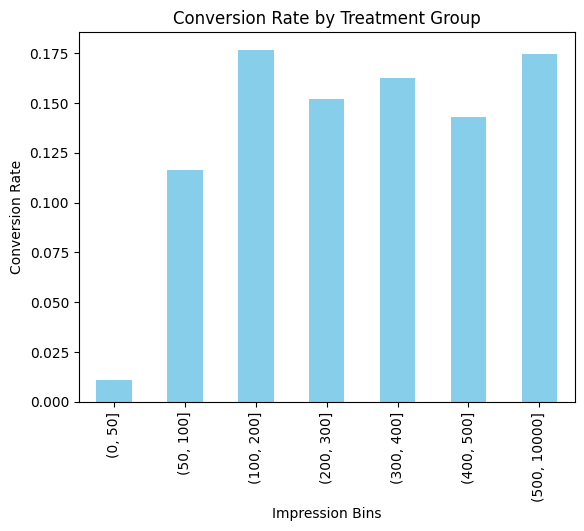

In [18]:
import matplotlib.pyplot as plt
conversion_rate = ads_data_1.groupby('test_group_impr_count')['converted'].mean()
conversion_rate.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Treatment Group')
plt.xlabel('Impression Bins')
plt.ylabel('Conversion Rate')
plt.show()